# CSE 144 Winter 2022 Assignment 2
Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel→→Restart) and then run all cells (in the menubar, select Cell→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [1]:
NAME = "Tarun Sohal"
STUDENT_ID = "1898930"

## Question 1 - Linear Regression On Non-Linear Data (Total: 50 points)

In this question, you will be implementing the linear regression algorithm from scratch in Python. As you know, linear regression aims to map feature vectors to a continuous value in the range $[-\infty,+\infty]$ by linearly combining the feature values.

### Model Representation
As you have seen previously in assignment 1, we represent our data as a dataframe or a feature matrix. 

Let our feature matrix be $X$ whose dimensions are $n \times m$, $\theta$ be a weight vector of dimensions $m \times 1$, the bias vector $b$ a vector of dimension $n\times 1$. Using these we can predict $\hat{Y}$
by the following relationship:

$$\hat{Y} = X\theta + b$$

(Does this look familiar? Remember $y = mx + b$)

This is equivalent to

$$\hat{Y} = X\theta \text{, where } \theta\in \mathbb{R^{m+1}},X\in\mathbb{R^{n\times m+1}}$$ The bias trick was applied here.

### Data: 

We generate random points and use them to create a polynomial.



### Fitting non-linear data

Data does not always follow a linear relationship from the independent variable $X$ to the dependent variable $y$. Fitting a linear model to this would be inaccurate and yield a high loss. 

If we want to model an order $d$ polynomial relationship between $X$ and $y$ we can augment our initial linear model where instead of having:
$$
y_i = \theta_0 + \theta_1 x_i
$$

We have:

$$
y_i = \theta_0 + \theta_1 x_i + \theta_2 x_i^2 + \cdots + \theta_d x_i^d
$$

We can use the same linear regression algorithm we if we first augment $X$ and add extra columns (or dimensions). 

$$ \textbf X =
\begin{bmatrix}
    x_{1}       & x_{1}^2 & \cdots & x_{1}^d \\
    x_{2}       & x_{2}^2 & \cdots & x_{2}^d \\
    \vdots       & \vdots & \ddots & \vdots \\
    x_{n}       & x_{n}^2 & \cdots & x_{n}^d
\end{bmatrix}$$

Then our new higher order $\hat y$ is computed same as before.

$$ \hat y =  X \theta =
\begin{bmatrix}
    1 & x_{1}       & x_{1}^2 & \cdots & x_{1}^d \\
    1 & x_{2}       & x_{2}^2 & \cdots & x_{2}^d \\
    \vdots & \vdots       & \vdots & \ddots & \vdots \\
    1 & x_{n}       & x_{n}^2 & \cdots & x_{n}^d
\end{bmatrix}
\begin{bmatrix}\theta_0 \\ \theta_1 \\ \vdots \\ \theta_{d} 
\end{bmatrix}=
\begin{bmatrix}
    \theta_0 + \theta_1 x_{1} + \theta_2 x_{1}^2 + \cdots + \theta_{d}  x_{1}^d \\
    \theta_0 + \theta_1 x_{2} + \theta_2 x_{2}^2 + \cdots + \theta_{d}  x_{2}^d  \\
    \vdots   \\
    \theta_0 + \theta_1 x_{n} + \theta_2 x_{n}^2 + \cdots + \theta_{d}  x_{n}^d
\end{bmatrix} 
= \begin{bmatrix}\hat y_1 \\ \hat y_2 \\ \vdots \\ \hat y_{n} 
\end{bmatrix}$$






# Generating the data

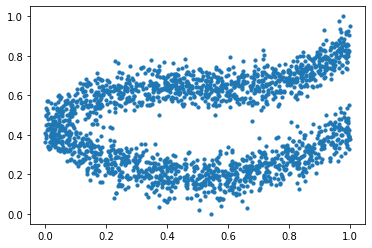

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_data(data):
    return (data - np.min(data))/(np.max(data) - np.min(data))

np.random.seed(33)
x = np.random.uniform(-10, 10, 1000)
poly_coeffs = np.random.uniform(-1,1, size=(4,1))
y = poly_coeffs[0] + poly_coeffs[1]*x + poly_coeffs[2]*(x ** 2) + poly_coeffs[3]*(x ** 3) + np.random.normal(0, 250, 1000)

x2 = np.random.uniform(-10, 10, 1000)
poly_coeffs = np.random.uniform(-1,1, size=(3,1))
y2 = poly_coeffs[0] - 2000 + poly_coeffs[1]*x2 + 50*poly_coeffs[2]*(x2 ** 2)  + np.random.normal(0, 250, 1000)

x = np.concatenate([x,x2])
y = np.concatenate([y,y2])
x = normalize_data(x)
y = normalize_data(y)

plt.scatter(x,y, s=10)
plt.show()

poly_data = np.hstack((x.reshape(-1,1),y.reshape(-1,1)))
np.random.shuffle(poly_data)
x = poly_data[:,0]
y = poly_data[:,1]

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [4]:
reg = LinearRegression().fit(x.reshape(-1,1), y)

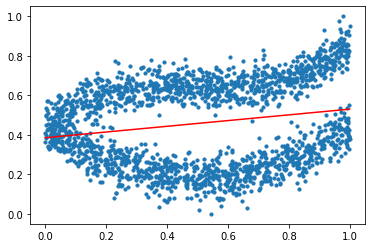

In [5]:
def compute_line_from_regr(X_data, y_data, regr):
    l_bound = np.min(X_data)
    r_bound = np.max(X_data)
    return [l_bound, r_bound], [l_bound * regr.coef_ + regr.intercept_, r_bound * regr.coef_ + regr.intercept_]

plt.scatter(x,y, s=10)
line_x, line_y = compute_line_from_regr(x.reshape(-1,1),y,reg)
plt.plot(line_x, line_y, color='r')
plt.show()

As we see above, this data doesn't follow a linear relationship, it follows some complex polynomial. In the next section you'll try to fit a higher degree polynomial to it.


## Weight regularization
When we try to fit a d-order polynomial to our data, we could end up overfitting. This happens when you try to fit a higher dimensional curve than what the distribution of our data actually exhibits. We can mitigate this by choosing an order $d$ that matches your data closely, but often times this is not directly apperant in noisy data. Another method to avoid overfitting is **regularizing**, where you modify your loss to keep weights small which flattens our polynomial. This helps us avoid learning polynomials that are too complex for our data.

To add regularization we modify our original loss function $J$ to include our regularizing term and a new hyperparameter that we tune $\lambda$. This controls the amount of regularizing we impose on the weights. We use the loss computed from the validation set to tweak this parameter.

$$
J(\theta)=\frac{1}{2n}\sum^{n}_{i=1}(h^{(i)}-y^{(i)})^2 + \lambda \sum^{d}_{j=1} \theta^2_j
$$

Our gradient computation also changes:

$$
\frac{\partial}{\partial\theta_j}J(\theta) = \frac{1}{n} \sum_{i=1}^{n} ( h^{(i)}-y^{(i)})x_{i,j}  + 2 \lambda\theta_j 
$$

We apply this gradient the same way as before in our gradient descent algorithm:
$$
 \theta_j = \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta)
$$

### 1(a) Train-Val-Test Split - 10 points

In [6]:
def bias_trick(X):
    # ========== YOUR CODE STARTS HERE ==========
    # Takes in a matrix and prepends a column of ones to it
   
    colofones = np.ones(np.size(X))
    #print(colofones.shape)
    colofones = colofones.reshape(np.shape(colofones)[0],1)
    X = X.reshape(np.shape(X)[0],1)
    #print(X.shape)
    #print(colofones.shape)
    #colofones = np.transpose(colofones)
    #print(X.shape)
    X = np.append(colofones,X ,axis=1)
    #print(X.shape)
    return X
    # ========== YOUR CODE STARTS HERE ==========

def separate_data(data):
    # Split into X (remember to use bias trick) and Y
    # ========== YOUR CODE STARTS HERE ==========
    # takes in our data and splits it into X and Y
      X = data[:,0]
      # = X.reshape(np.shape(X)[0],1)
      X = bias_trick(X)
      # print("PRINTING SHAPE\n")
      # print(X.shape)
      # print("DONE PRINTING SHAPE\n")
      Y = data[:,1]
      return X,Y
    # ========== YOUR CODE STARTS HERE ==========


'''
Takes raw data in and splits the data into 
X_train, y_train, X_test, y_test, X_val, y_val
Returns X_train, y_train, X_test, y_test, X_val, y_val
'''
from sklearn.model_selection import train_test_split
import random #for random seed
def train_test_validation_split(data, test_size=.20, validation_size=.20):
    # ========== YOUR CODE STARTS HERE ==========
    # seed = 144
    # random.seed(seed)
    # np.random.seed(seed)
    X,y = separate_data(data)
    X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size = test_size)
    # now we can create our validation sets out of X_train_val and y_train_val (we specify train size to get right dimensions)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=validation_size / (1-test_size))
    return X_train, y_train, X_test, y_test, X_val, y_val
    # ========== YOUR CODE STARTS HERE ==========

### 1b) L2 Regularization - 40 points

Implement:

* ```mse``` - 5 points
* ```mse_derivative``` - 5 points
* ```l2norm``` - 5 points
* ```l2norm_derivative``` - 5 points
* ```compute_cost``` - 5 points
* ```gradient_descent_step``` - 5 points
* ```polynomial_regression``` - 10 points


In [7]:
'''
Adds columns to your data up to the specified degree.
Ex: If degree=3, (x) -> (x, x^2, x^3)
'''
def add_polycols(X,degree):
    x_col = X[:,-1]

    for i in range(2, degree+1):
        X = np.hstack((X,(x_col**i).reshape(-1,1)))
    return X

'''
Takes the target values and predicted values and calculates the absolute error 
between them 
'''
def mse(y_pred, y_true):
    # ========== YOUR CODE STARTS HERE ==========
    # simply run through the MSE code from last assignment
    n = len(y_pred)
    MSEarray = np.subtract(y_pred, y_true)
    MSEarray = np.square(MSEarray)
    return (1/(2*n))*np.sum(MSEarray)
    # ========== YOUR CODE STARTS HERE ==========

'''
Implementation of the derivative of MSE.
Returns a vector of derivations of loss with respect to each of the dimensions
[\partial loss / \partial \theta_i]
'''
def mse_derivative(X,y,theta):
    # ========== YOUR CODE STARTS HERE ==========
    # should be the same formula as HW1's def gradient (we will be adding a regularization term LATEr)
    mse_derivative = (np.transpose(theta)@np.transpose(X)@X) - (np.transpose(y)@X)
    mse_derivative= mse_derivative/len(X)
    return mse_derivative
    pass
    # ========== YOUR CODE STARTS HERE ==========

'''
Computes L2 norm from theta and lambda.
Returns a scalar l2norm.
'''
def l2norm(theta, lamb):
    # ========== YOUR CODE STARTS HERE ==========
    # Theta is the vector of weights, and lambda is the regularization term
    # take the squared sum of theta and multiply it by lambda
    norm = lamb *(np.sum(np.square(theta)))
    return norm
    # ========== YOUR CODE STARTS HERE ==========

'''
Computes derivative of L2 norm.
Returns a vector of derivative of L2 norms.
'''
def l2norm_derivative(theta, lamb):
    # ========== YOUR CODE STARTS HERE ==========
    # Note there is no regularization on the bias term.
    # this is what we add to our gradient descent step
    l2normd = 2*lamb*theta
    # print(l2normd.shape)
    return l2normd
    # ========== YOUR CODE STARTS HERE ==========

'''
Computes total cost (cost function + regularization term)
'''
def compute_cost(X, y, theta, lamb):
    # ========== YOUR CODE STARTS HERE ==========
    # implementing cost function that includes regularization
    # MSE_loss + regularization term
    return mse(X,y) + l2norm(theta,lamb)
    # ========== YOUR CODE STARTS HERE ==========

'''
Gradient descent step. 
Takes X, y, theta vector, and alpha. 
Returns an updated theta vector.
'''
def gradient_descent_step(X, y, theta, alpha, lamb):
    # ========== YOUR CODE STARTS HERE ==========
    # gradient descent + regulizer
    #print(theta.shape) 
    gradient = np.transpose(mse_derivative(X,y,theta))

    theta = theta - alpha* (gradient + l2norm_derivative(theta,lamb))
    #print(theta.shape)
    return theta
    # ========== YOUR CODE STARTS HERE ==========


def polynomial_regression(data, degree, num_epochs=100000, alpha=1e-4, lamb=0):
    # Get training, testing, and validation sets by calling train_test_validation_split()
    # ========== YOUR CODE STARTS HERE ==========
    X_train, y_train, X_test, y_test, X_val, y_val = train_test_validation_split(data)
    # Record training and validation errors in lists
    train_errors = []
    val_errors = []

    # Add the appropriate amount of columns to each of your sets of data.
    #X_train = X_train.reshape(np.shape(X_train)[0],1)
    X_train = add_polycols(X_train,degree)
    #X_test = X_test.reshape(np.shape(X_test)[0],1)
    X_test = add_polycols(X_test,degree)
    #X_val = X_val.reshape(np.shape(X_val)[0],1)
    X_val = add_polycols(X_val,degree)
    # print(X_train.shape)
    # print(X_test.shape)
    # print(X_val.shape)
    y_val = y_val.reshape(np.shape(y_val)[0],1)
    y_test = y_test.reshape(np.shape(y_test)[0],1)
    y_train = y_train.reshape(np.shape(y_train)[0],1)

    # print(y_val.shape)
    # print(y_train.shape)
    # print(y_test.shape)

    # Define theta
    numcols = np.shape(X_train)[1]
    theta = np.zeros(numcols)
    theta = theta.reshape(np.shape(theta)[0],1)
    # Carry out training loop

    for i in range(num_epochs):
        # Do gradient descent on the training set
        train_error = compute_cost(X_train@theta,y_train,theta,lamb)
        #print(loss_train)
        #saving loss to train_loss_history
        train_errors.append(train_error)
        #doing the same to validation set
        val_error = compute_cost(X_val@theta,y_val,theta,lamb)
        #print(loss_val)
        val_errors.append(val_error)
        # This prints the validation loss
        # call the gradient step
        theta = gradient_descent_step(X_train,y_train,theta,alpha,lamb)
        if i % (num_epochs//10) == 0:
            print(f'({i} epochs) Training loss: {train_error}, Validation loss: {val_error}') 
    print(f'({i} epochs) Final training loss: {train_error}, Final validation loss: {val_error}') 
    
    # Compute the testing loss
    # use final thetas to compute test loss
    test_error = compute_cost(X_test @ theta, y_test,theta,lamb)
    print(f'Final testing loss: {test_error}')
    plt.plot(np.arange(num_epochs), train_errors, label="Train loss")
    plt.plot(np.arange(num_epochs), val_errors, label="Val loss")
    plt.title("Train + validation loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    return theta
    # ========== YOUR CODE STARTS HERE ==========

As we mentioned above, we use the validation set's loss to tweak our hyperparameters. Please carry out the training task while monitoring the validation loss and varying the polynomial order $d$ and regularization constant $\lambda$. Your answer should get close to minimizing the validation and testing losses. 

(0 epochs) Training loss: 0.1286670335002215, Validation loss: 0.12455097367799883
(4000 epochs) Training loss: 0.05121131083266669, Validation loss: 0.048846299597588495
(8000 epochs) Training loss: 0.03211422916897005, Validation loss: 0.03062148519815934
(12000 epochs) Training loss: 0.026843623244047713, Validation loss: 0.025820994926234478
(16000 epochs) Training loss: 0.0249952666559054, Validation loss: 0.02423945274634047
(20000 epochs) Training loss: 0.024099668391603633, Validation loss: 0.023502382857686275
(24000 epochs) Training loss: 0.023542385683191967, Validation loss: 0.023044048026906676
(28000 epochs) Training loss: 0.023150173927126448, Validation loss: 0.022717010007775908
(32000 epochs) Training loss: 0.022860206670682205, Validation loss: 0.02247239285059724
(36000 epochs) Training loss: 0.022641229951704752, Validation loss: 0.022286638192724993
(39999 epochs) Final training loss: 0.022473741395486545, Final validation loss: 0.022144596703430167
Final testing 

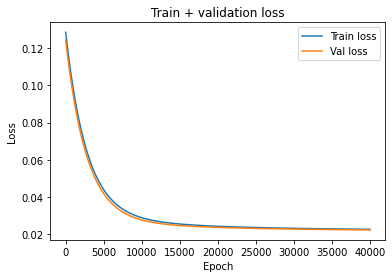

In [8]:
# degree d
polynomial_order = 10

# regularization constant lambda
regularization_param = 0
num_epochs=40000
theta = polynomial_regression(poly_data, polynomial_order, lamb=regularization_param, num_epochs=num_epochs, alpha=1e-4)

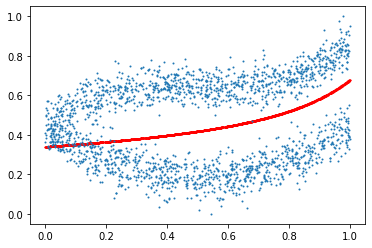

In [9]:
# Call plot_results() to see how your polynomial fits.
def plot_results(theta, X, Y):
    y_hat = sum([t*X**i for i,t in enumerate(theta)])
    plt.scatter(X, y_hat, s=1, color='r')
    plt.scatter(X, Y, s=1)
    plt.show()
plot_results(theta, x, y)

# Question 2 Logistic Regression - (Total: 50 points)
##Dataset preparation
In the cell below, you will read training and test data. You should split the dataset into features and labels for each of training, validation, and test sets. 

In [10]:
%%shell
rm *.csv*
wget -nv https://storage.googleapis.com/cse144/{train,test}.csv

rm: cannot remove '*.csv*': No such file or directory
2022-05-05 03:43:54 URL:https://storage.googleapis.com/cse144/train.csv [32902/32902] -> "train.csv" [1]
2022-05-05 03:43:54 URL:https://storage.googleapis.com/cse144/test.csv [8270/8270] -> "test.csv" [1]
FINISHED --2022-05-05 03:43:54--
Total wall clock time: 0.03s
Downloaded: 2 files, 40K in 0.001s (77.7 MB/s)


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format="retina"
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


def plot_data(x: np.ndarray, y: np.ndarray) -> None:
    """
    Plot a dataset with 2-d feature vectors and binary labels. 

    Args:
        x: 2-d feature vectors
        y: 1-d binary labels.
    """
    class0_idx = np.where(y == 0)[0]
    class1_idx = np.where(y == 1)[0]
    feature0 = x[:, 0]
    feature1 = x[:, 1]
    plt.scatter(feature0[class0_idx], feature1[class0_idx], label="0")
    plt.scatter(feature0[class1_idx], feature1[class1_idx], label="1")
    plt.legend()
    plt.show()


def plot_decision_boundary(theta, x) -> None:
    """
    Plot the decision boundary using theta. Use this function with plot_data().

    Args:
        theta: a 3-d weight vector.
        x: 2-d feature vectors, which is used to decide the span of the decision
           boundary.
    """
    xx = np.linspace(min(x[:, 0]), max(x[:, 0]))
    yy = (-theta[1] / theta[2]) * xx - (theta[0]) / theta[2]
    plt.plot(xx, yy, color="red", label="boundary")
    plt.ylim(min(x[:, 1]), max(x[:, 1]))


# Read datasts and split your training data into train & validation sets. Split
# features from labels after that.
# ========== YOUR CODE STARTS HERE ==========
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")
test_data.info()
#split out training data into train and validation sets
val_data = train_data.sample(frac = 0.25)
train_data = train_data.sample(frac = 0.75)
#now we manually assign columns to our train_test_split stuff
columns = ['feature1','feature2']
x_train = train_data.drop(labels = 'label', axis = 1)
y_train = train_data.drop(labels = columns, axis = 1)
x_test = test_data.drop(labels = 'label', axis = 1)
y_test = test_data.drop(labels = columns,axis = 1)
x_val = val_data.drop(labels = 'label', axis = 1)
y_val = val_data.drop(labels = columns, axis = 1)
#turn into ndarrays, not dataframes
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()
x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

# ========== YOUR CODE ENDS HERE ==========
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  200 non-null    float64
 1   feature2  200 non-null    float64
 2   label     200 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.8 KB
(600, 2) (600, 1)
(200, 2) (200, 1)
(200, 2) (200, 1)


## Plot training and validation sets

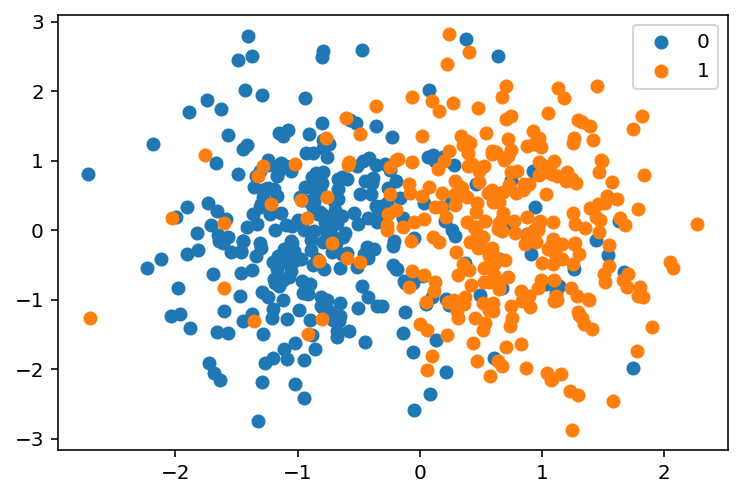

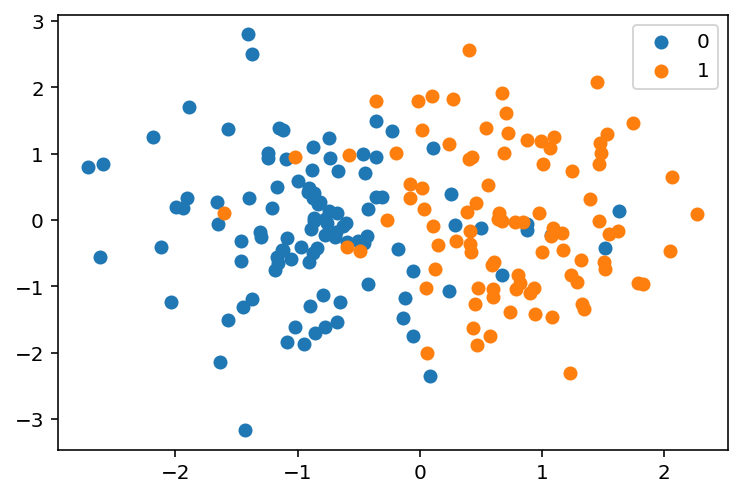

In [12]:
plot_data(x_train, y_train)
plot_data(x_val, y_val)

# Logistic regression
You'll complete the missing parts in the eight functions in the `LogisticRegressionTrainer` class below. Note that you are not supposed to return anything in `gradient_descent_step()` but update the parameters. Especially, do not forget to add the regularization term in `cross_entropy_loss()`.

TODO:
* initialize ```theta``` - 5 points
* ```gradient_descent_step``` - 5 points
* ```sigmoid``` - 5 points
* ```cross_entropy_loss``` - 5 points
* ```cross_entropy_loss_derivative``` - 5 points
* ```accuracy``` - 5 points
* ```train``` - 5 points
* ```evaluate``` - 5 points
* Use Scikit learn - 10 points 

In [15]:
class LogisticRegressionTrainer:
    def __init__(
        self,
        num_features: int,
        learning_rate: float = 1e-2,
        num_epochs: int = 500,
        lambd: float = 0.0,
    ) -> None:
        """Initialize a logisitc regression trainer."""
        self.lambd = lambd
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_features = num_features
        self.train_loss_history = []
        self.val_loss_history = []
        self.train_acc_history = []
        self.val_acc_history = []
        self.test_loss = None
        self.test_acc = None

        # Initialize weights for your model. You can use any initialization methods.
        # ========== YOUR CODE STARTS HERE ==========
        #Theta is now a field in our class (it will be an array of the length of the features)
        self.theta = np.zeros(num_features+1)
        #reshape so it dont act up
        self.theta = self.theta.reshape(np.shape(self.theta)[0],1)
        # ========== YOUR CODE ENDS HERE ==========

    def gradient_descent_step(self, x: np.ndarray, y: np.ndarray) -> None:
        """
        Perform a single step of gradient update.

        Args:
            x: A matrix of features.
            y: A vector of labels.
        """
        # ========== YOUR CODE STARTS HERE ==========
        #update self.theta within this function
        self.theta = self.theta - self.learning_rate*self.cross_entropy_loss_derivative(x,y)
        # ========== YOUR CODE ENDS HERE ==========

    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        """
        Convert raw model output (logits) to probabilities.

        Args:
            z: Raw model output (logits).

        Returns:
            A vector (or float, if your input is a scalar) of probabilties.
        """
        # ========== YOUR CODE STARTS HERE ==========
        # Our z is already calculated (should just be X^T @ theta)
        # iterate through, run the sigmoid calculation, append to new array
        arrayh = np.empty(np.shape(z))
        #problem might arise with how for loops are used with nd arrays
        arrayh = np.exp(-z)
        arrayh = 1/(1+arrayh)

        return arrayh
        # ========== YOUR CODE ENDS HERE ==========

    def cross_entropy_loss(self, pred: np.ndarray, target: np.ndarray) -> float:
        """
        Calculates the binary cross-entropy loss given predictions and targets.
        The loss function should add the regularization term.

        Args:
            pred: Predicted labels (probabilities).
            target: Ground-truth labels.

        Returns:
            A scalar of loss.
        """
        assert pred.shape == target.shape
        # ========== YOUR CODE STARTS HERE ==========
        #predictions are H, ground truth labels are Y
        summation = 0
        for i in range(len(target)) :
          summation += ((target[i])*np.log(pred[i]) + (1-target[i])*np.log(1-pred[i]))
        summation = summation*(-1/len(target)) + (self.lambd *(np.sum(np.square(self.theta))))
        return summation
        # ========== YOUR CODE ENDS HERE ==========

    def cross_entropy_loss_derivative(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Calculate the derivative of the loss function w.r.t. theta. The derivative of the
        loss function should also add the derivative of the L2 regularization term.

        Args:
            x: Feature vectors.
            y: Ground-truth labels.

        Returns:
            A vector with the same dimension as theta, where each element is the
            partial derivative of the loss function w.r.t. the corresponding element
            in theta.
        """
        # ========== YOUR CODE STARTS HERE ==========
        #think of this as our gradient function
        #first we need our prediction vector
        #print(x)
        #print(self.theta.shape)
        pred = x @ self.theta
        pred = self.sigmoid(pred)
        n = len(x)
        gradient = np.transpose(x) @ (pred - y)
        gradient = ((1/n) * (gradient)) + (2*self.lambd*self.theta)
        return gradient
        
        # ========== YOUR CODE ENDS HERE ==========

    def accuracy(self, pred: np.ndarray, target: np.ndarray) -> float:
        """
        Calculates the percentage of matched labels given predictions and targets.

        Args:
            pred: Predicted labels (rounded probabilities).
            target: Ground-truth labels.

        Return:
            The accuracy score (a float) given the predicted labels and the true labels.
        """
        assert pred.shape == target.shape
        # ========== YOUR CODE STARTS HERE ==========
        # we are comparing each element in pred and target to see if they match
        #100% accuracy if all labels equal each other
        pred = np.round(pred)
        trutharray = np.equal(pred,target)
        # print(pred)
        # print(target)
        #print(trutharray)
        n = len(pred)
        #count the number of nonzero values
        numtruth = np.sum(trutharray)
        accuracy = numtruth / n
        return accuracy
        # ========== YOUR CODE ENDS HERE ==========

    def train(
        self,
        x_train: np.ndarray,
        y_train: np.ndarray,
        x_val: np.ndarray,
        y_val: np.ndarray,
    ) -> None:
        """
        Run gradient descent for n epochs, where n = self.num_epochs. In every epoch,
            1. Update theta.
            2. Calculate the training loss & accuracy given the current theta, and append 
               then to self.train_loss_history and self.train_acc_history.
            3. Calculate the validation loss & accuracy given the current theta, and 
               append then to self.train_loss_history and self.train_acc_history.

        If you wish to use the bias trick, please remember to use it before the for loop.

        Args:
            x_train: Feature vectors for training.
            y_train: Ground-truth labels for training.
            x_val: Feature vectors for validation.
            y_val: Ground-truth labels for validation.
        """
        # ========== YOUR CODE STARTS HERE ==========
        # Do bias trick
        x_train = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
        x_val = np.hstack((np.ones((x_val.shape[0], 1)), x_val))
        # print(x_train.shape)
        # print(x_val.shape)
        for epoch in range(self.num_epochs):
            # Do a gradient descent step
            self.gradient_descent_step(x_train,y_train)
            # Calcuate train loss
            train_loss = self.cross_entropy_loss(self.sigmoid(x_train @ self.theta),y_train)
            #print(train_loss)
            # Calcuate val loss
            val_loss = self.cross_entropy_loss(self.sigmoid(x_val @ self.theta),y_val)
            # Calculate training accuracy
            train_acc = self.accuracy(self.sigmoid(x_train @ self.theta), y_train)
            #Calcuate validation accuracy
            val_acc = self.accuracy(self.sigmoid(x_val @ self.theta),y_val)
            # Record train loss
            self.train_loss_history.append(train_loss)
            # Record val loss
            self.val_loss_history.append(val_loss)
            # Record training accuracy
            self.train_acc_history.append(train_acc)
            #Record validation accuracy
            self.val_acc_history.append(val_acc)
        # ========== YOUR CODE ENDS HERE ==========

    def evaluate(self, x_test: np.ndarray, y_test: np.ndarray) -> None:
        """
        Evaluate the model on test set and store the test loss int self.test_loss and 
        test accuracy in self.test_acc. In other words, you should get the test loss and accraucy here.

        If you used the bias trick in train(), you have to also use it here.

        Args:
            x_test: Feature vectors for testing.
            y_test: Ground-truth labels for testing.
        """
        # ========== YOUR CODE STARTS HERE ==========
        # Do bias trick
        x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))
        # Calculate test loss
        self.test_loss = self.cross_entropy_loss(self.sigmoid(x_test @ self.theta),y_test)
        # Record test accuracy
        self.test_acc = self.accuracy(self.sigmoid(x_test @ self.theta), y_test)
        # ========== YOUR CODE ENDS HERE ==========

## Train a logistic regression classifier

Final train loss: [0.47197983]
Final validation loss: [0.43125884]
Final train acc: 0.8466666666666667
Final validation acc: 0.885


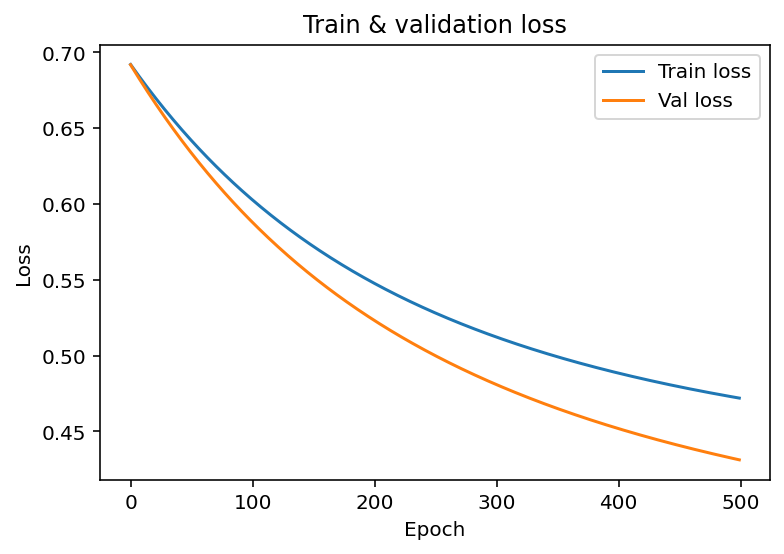

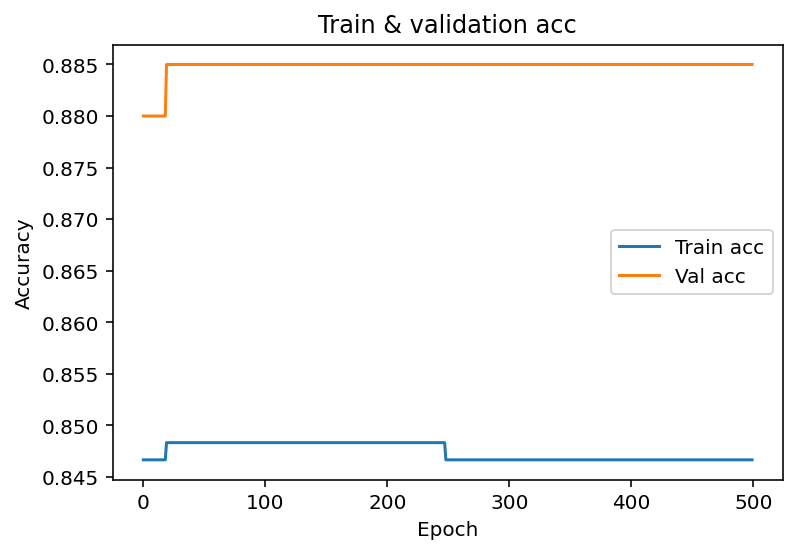

In [16]:
# Train a logistic regression classifier
# ========== YOUR CODE STARTS HERE ==========
trainer = LogisticRegressionTrainer(num_features = 2)
trainer.train(x_train,y_train,x_val,y_val)
# ========== YOUR CODE ENDS HERE ==========

print(f"Final train loss: {trainer.train_loss_history[-1]}")
print(f"Final validation loss: {trainer.val_loss_history[-1]}")
print(f"Final train acc: {trainer.train_acc_history[-1]}")
print(f"Final validation acc: {trainer.val_acc_history[-1]}")

plt.plot(np.arange(trainer.num_epochs), trainer.train_loss_history, label="Train loss")
plt.plot(np.arange(trainer.num_epochs), trainer.val_loss_history, label="Val loss")
plt.title("Train & validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(np.arange(trainer.num_epochs), trainer.train_acc_history, label="Train acc")
plt.plot(np.arange(trainer.num_epochs), trainer.val_acc_history, label="Val acc")
plt.title("Train & validation acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Evaluation

In [17]:
# Evaluate your model on the test set
# ========== YOUR CODE STARTS HERE ==========
trainer.evaluate(x_test,y_test)
# ========== YOUR CODE ENDS HERE ==========
print(f"Test loss: {trainer.test_loss}")
print(f"Test acc: {trainer.test_acc}")

Test loss: [0.4559526]
Test acc: 0.88


# Using Sci-kit Learn

Tasks

* Import and instantiate a Logistic Regression Classifier
* Fit the model to the training set
* Report the training set, validation set and test set accuracy.
* Visually compare this model to your previous model by plotting the decision boundary on the validation set. Comment on the coefficients learned.

In [18]:
# Import and make an instance of a Sklearn Logistic Regression Classifier 
# ========== YOUR CODE STARTS HERE ==========
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
# ========== YOUR CODE STARTS HERE ==========

In [19]:
# Fit your classifier to the training set you created previously.
# ========== YOUR CODE STARTS HERE ==========
#reshape y to 1d array
y_train = y_train.reshape(len(y_train),)
lr_classifier.fit(x_train,y_train)
# ========== YOUR CODE STARTS HERE ==========

LogisticRegression()

In [20]:
# Report accuracy on the training, val and test set.
# ========== YOUR CODE STARTS HERE ==========
pred = lr_classifier.score(x_test,y_test)
pred2 = lr_classifier.score(x_train,y_train)
pred3 = lr_classifier.score(x_val,y_val)
print(pred)
print(pred2)
print(pred3)
# ========== YOUR CODE STARTS HERE ==========

0.875
0.8483333333333334
0.885


## Plotting decision boundaries

My logistic regression weights: [[-0.01922405]
 [ 1.00230312]
 [ 0.07410183]]


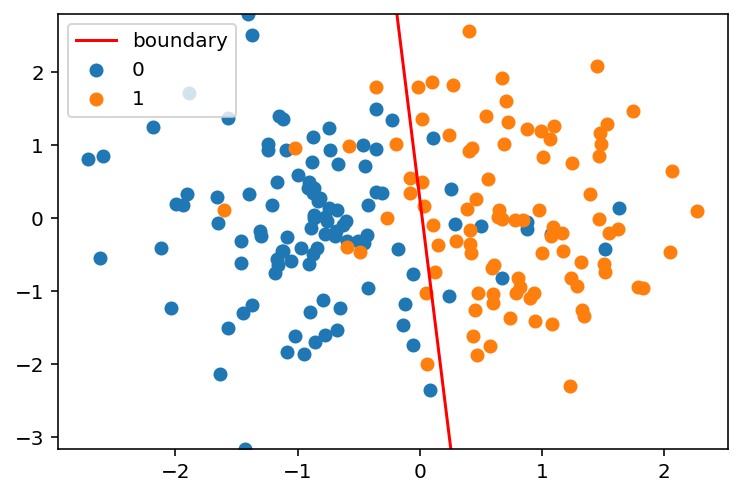

Sklearn logisitic regression weights: [0.01634988 2.03272716 0.18273212]


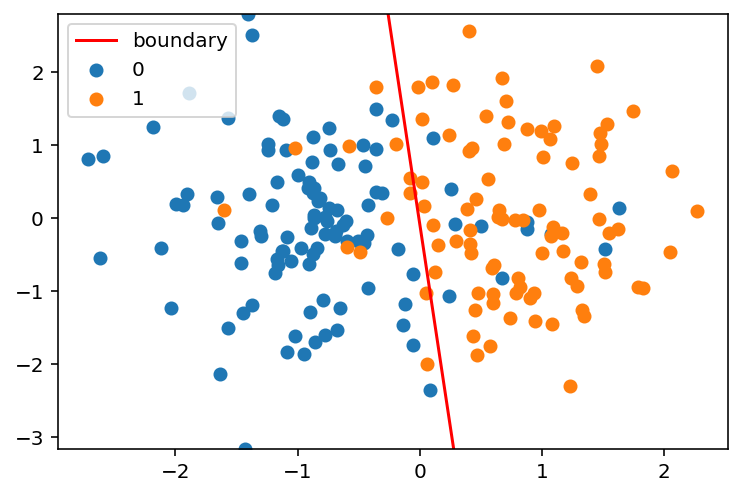

In [21]:
# 0 = theta0 + theta1 * x + theta2 * y
# y = (-theta0 - theta1 * x) / theta2
print(f"My logistic regression weights: {trainer.theta}")
plot_decision_boundary(trainer.theta, x_val)
plot_data(x_val, y_val)

print(f"Sklearn logisitic regression weights: {np.append(lr_classifier.intercept_, lr_classifier.coef_)}")
plot_decision_boundary(np.append(lr_classifier.intercept_, lr_classifier.coef_), x_val)
plot_data(x_val, y_val)